<h2><font color='pink'>Análise de Séries Temporais em Python</font></h2>

Problema de Negócio:

Usando dados históricos das vendas ao longo de 2023 seria possível prever o total de vendas em Janeiro/2024?

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.13


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

<strong> Carregando os Dados </strong>

In [3]:
# Carrega o dataset
df_dsa = pd.read_csv('dataset.csv')

In [4]:
df_dsa.shape

(365, 2)

In [5]:
df_dsa.columns

Index(['Data', 'Total_Vendas'], dtype='object')

In [6]:
df_dsa.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [7]:
df_dsa.tail()

,Data,Total_Vendas
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244
364,2023-12-31,71.650720


<strong> Pré-Processamento dos Dados </strong>

In [8]:
# Valor mínimo da coluna data
df_dsa['Data'].min()

'2023-01-01'

In [9]:
# Valor máximo da coluna data
df_dsa['Data'].max()

'2023-12-31'

In [10]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [11]:
# Converte a coluna de data no tipo datetime
df_dsa['Data'] = pd.to_datetime(df_dsa['Data'])

In [12]:
df_dsa.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [13]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [14]:
# Converter o DataFrame em uma série temporal com a data como índice
serie_temporal = df_dsa.set_index('Data')['Total_Vendas']

In [15]:
type(serie_temporal)

pandas.core.series.Series

In [16]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

In [17]:
# Fornece a frequência da série temporal (diária, neste caso)
serie_temporal = serie_temporal.asfreq('D')

In [18]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

<strong> Análise Exploratória </strong>

Previsão de dados históricos.

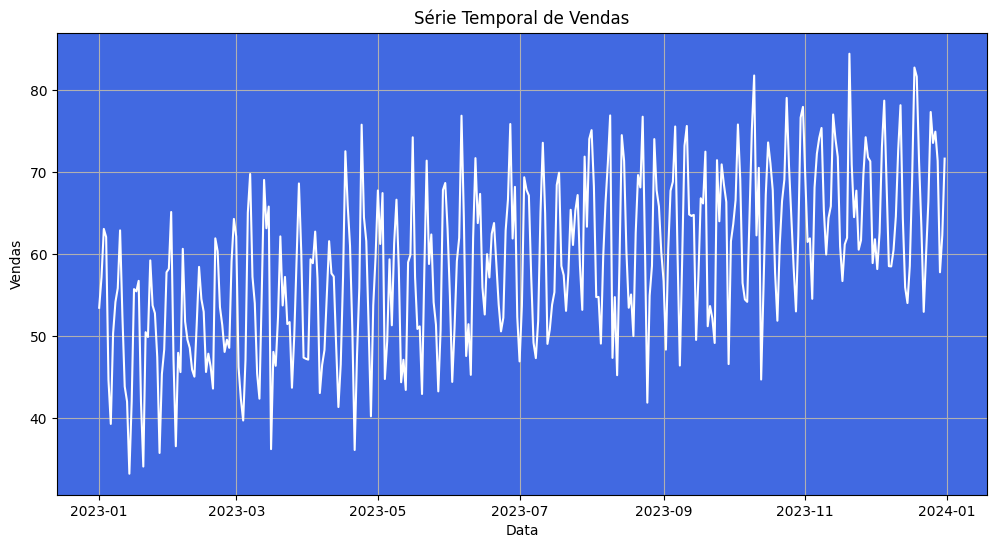

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal, color="white")
plt.gca().set_facecolor("#4169E1")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.title("Série Temporal de Vendas")
plt.grid(True)
plt.show()

In [20]:
# Cria o modelo de Suavização Exponencial
modelo = SimpleExpSmoothing(serie_temporal)

In [21]:
# Treinamento (ajuste) do modelo
modelo_ajustado = modelo.fit(smoothing_level=0.2)

/home/codespace/.local/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [22]:
# Extrai os valores previstos pelo modelo
suavizacao_exponencial = modelo_ajustado.fittedvalues

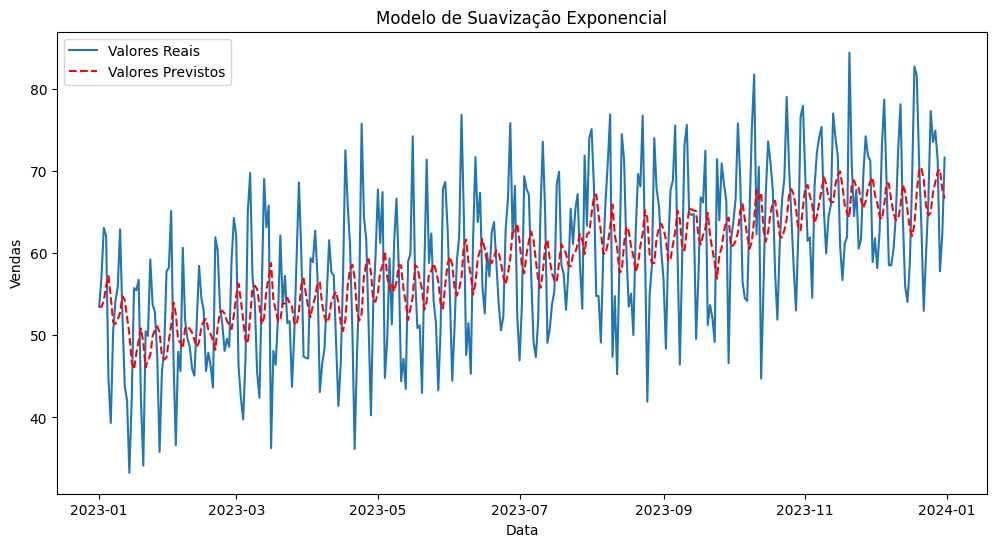

In [23]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal, label="Valores Reais")
plt.plot(suavizacao_exponencial, label="Valores Previstos", linestyle="--", color="red")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.title("Modelo de Suavização Exponencial")
plt.legend()
plt.show()

<strong>Deploy e Previsão com o Modelo Treinado</strong>

Previsão de pontos de tempo no futuro (forecasting).

In [24]:
# Fazer previsões
num_previsoes = 1 # janela de previsão
previsoes = modelo_ajustado.forecast(steps=num_previsoes) # quantidade de passos no futuro

In [25]:
print("Previsão do Total de Vendas para Janeiro/2024:", round(previsoes[0], 4))

Previsão do Total de Vendas para Janeiro/2024: 67.6499


/tmp/ipykernel_33334/1766019712.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Previsão do Total de Vendas para Janeiro/2024:", round(previsoes[0], 4))


<h3> Fim </h3>